In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('../data/movement-speeds-hourly-nairobi.csv',
                usecols=['hour','utc_timestamp','osm_way_id','osm_start_node_id', 'osm_end_node_id', 'speed_kph_mean','speed_kph_stddev'])

def std_avg(x):
    ans = 0
    for i in x:
        if not pd.isna(i):
            ans  = ans + i**2
    ans = ans/len(x)
    ans = ans**0.5
    return ans

speed = df.groupby(['osm_way_id','utc_timestamp'], as_index=False).agg({'speed_kph_mean':'mean', 'speed_kph_stddev':std_avg}).sort_values(by = ['utc_timestamp'])
speed['utc_timestamp'] = pd.to_datetime(speed['utc_timestamp']).add(pd.to_timedelta(3, unit='h'))
speed

,osm_way_id,utc_timestamp,speed_kph_mean,speed_kph_stddev
0,4723375,2018-01-01 00:00:00+00:00,45.134,25.313
8544,614460296,2018-01-01 00:00:00+00:00,35.519,11.194
7880,614460287,2018-01-01 00:00:00+00:00,36.502,9.412
7664,512985265,2018-01-01 00:00:00+00:00,32.283,8.969
1009,24026994,2018-01-01 00:00:00+00:00,60.260,21.778
...,...,...,...,...
3512,96882517,2018-01-31 23:00:00+00:00,26.088,5.501
9180,614460296,2018-01-31 23:00:00+00:00,38.765,15.015
7663,344083166,2018-01-31 23:00:00+00:00,37.405,8.805
4077,231510705,2018-01-31 23:00:00+00:00,34.910,6.106


In [10]:

s_lim=50
s1 = 2.0*s_lim/3.0
s2 = 0.5*s_lim

speed['phase'] = speed.apply(lambda row: 2 if row['speed_kph_mean'] > s1 else(1 if row['speed_kph_mean'] > s2 else (np.nan if pd.isna(row['speed_kph_mean']) else 0)),axis=1)
speed


,osm_way_id,utc_timestamp,speed_kph_mean,speed_kph_stddev,phase
0,4723375,2018-01-01 00:00:00+00:00,45.134,25.313,2
8544,614460296,2018-01-01 00:00:00+00:00,35.519,11.194,2
7880,614460287,2018-01-01 00:00:00+00:00,36.502,9.412,2
7664,512985265,2018-01-01 00:00:00+00:00,32.283,8.969,1
1009,24026994,2018-01-01 00:00:00+00:00,60.260,21.778,2
...,...,...,...,...,...
3512,96882517,2018-01-31 23:00:00+00:00,26.088,5.501,1
9180,614460296,2018-01-31 23:00:00+00:00,38.765,15.015,2
7663,344083166,2018-01-31 23:00:00+00:00,37.405,8.805,2
4077,231510705,2018-01-31 23:00:00+00:00,34.910,6.106,2


In [11]:
speed['next_timestamp'] = pd.to_datetime(speed['utc_timestamp']).add(pd.to_timedelta(1, unit='h'))
speed['prev_timestamp'] = pd.to_datetime(speed['utc_timestamp']).add(pd.to_timedelta(-1, unit='h'))
speed

,osm_way_id,utc_timestamp,speed_kph_mean,speed_kph_stddev,phase,next_timestamp,prev_timestamp
0,4723375,2018-01-01 00:00:00+00:00,45.134,25.313,2,2018-01-01 01:00:00+00:00,2017-12-31 23:00:00+00:00
8544,614460296,2018-01-01 00:00:00+00:00,35.519,11.194,2,2018-01-01 01:00:00+00:00,2017-12-31 23:00:00+00:00
7880,614460287,2018-01-01 00:00:00+00:00,36.502,9.412,2,2018-01-01 01:00:00+00:00,2017-12-31 23:00:00+00:00
7664,512985265,2018-01-01 00:00:00+00:00,32.283,8.969,1,2018-01-01 01:00:00+00:00,2017-12-31 23:00:00+00:00
1009,24026994,2018-01-01 00:00:00+00:00,60.260,21.778,2,2018-01-01 01:00:00+00:00,2017-12-31 23:00:00+00:00
...,...,...,...,...,...,...,...
3512,96882517,2018-01-31 23:00:00+00:00,26.088,5.501,1,2018-02-01 00:00:00+00:00,2018-01-31 22:00:00+00:00
9180,614460296,2018-01-31 23:00:00+00:00,38.765,15.015,2,2018-02-01 00:00:00+00:00,2018-01-31 22:00:00+00:00
7663,344083166,2018-01-31 23:00:00+00:00,37.405,8.805,2,2018-02-01 00:00:00+00:00,2018-01-31 22:00:00+00:00
4077,231510705,2018-01-31 23:00:00+00:00,34.910,6.106,2,2018-02-01 00:00:00+00:00,2018-01-31 22:00:00+00:00


In [12]:
# speed[['osm_way_id','phase','next_timestamp']].rename(columns=)

speed=speed.merge(right=speed[['osm_way_id','utc_timestamp','phase']]
                .rename(columns={'phase': 'next_phase','utc_timestamp':'timestamp'}),
            left_on=['osm_way_id','next_timestamp'],
            right_on=['osm_way_id','timestamp'],
            how='left').drop(columns='timestamp')


In [13]:
speed['sudden_traffic'] = speed.apply(lambda r: True if (r['phase'] == 2 and r['next_phase'] == 0) else False, axis =1)
speed

,osm_way_id,utc_timestamp,speed_kph_mean,speed_kph_stddev,phase,next_timestamp,prev_timestamp,next_phase,sudden_traffic
0,4723375,2018-01-01 00:00:00+00:00,45.134,25.313,2,2018-01-01 01:00:00+00:00,2017-12-31 23:00:00+00:00,2.0,False
1,614460296,2018-01-01 00:00:00+00:00,35.519,11.194,2,2018-01-01 01:00:00+00:00,2017-12-31 23:00:00+00:00,1.0,False
2,614460287,2018-01-01 00:00:00+00:00,36.502,9.412,2,2018-01-01 01:00:00+00:00,2017-12-31 23:00:00+00:00,2.0,False
3,512985265,2018-01-01 00:00:00+00:00,32.283,8.969,1,2018-01-01 01:00:00+00:00,2017-12-31 23:00:00+00:00,1.0,False
4,24026994,2018-01-01 00:00:00+00:00,60.260,21.778,2,2018-01-01 01:00:00+00:00,2017-12-31 23:00:00+00:00,2.0,False
...,...,...,...,...,...,...,...,...,...
9369,96882517,2018-01-31 23:00:00+00:00,26.088,5.501,1,2018-02-01 00:00:00+00:00,2018-01-31 22:00:00+00:00,NaN,False
9370,614460296,2018-01-31 23:00:00+00:00,38.765,15.015,2,2018-02-01 00:00:00+00:00,2018-01-31 22:00:00+00:00,NaN,False
9371,344083166,2018-01-31 23:00:00+00:00,37.405,8.805,2,2018-02-01 00:00:00+00:00,2018-01-31 22:00:00+00:00,NaN,False
9372,231510705,2018-01-31 23:00:00+00:00,34.910,6.106,2,2018-02-01 00:00:00+00:00,2018-01-31 22:00:00+00:00,NaN,False


In [14]:
s0 = speed[(speed['phase']==0)& (speed['next_phase'] != 0)]

def getMinPhase0(s0,r):
    if not r['sudden_traffic']:
        return np.nan
    else:
        return (min(s0[(s0['osm_way_id'] == r['osm_way_id']) & 
                       (s0['utc_timestamp']>r['utc_timestamp'])]['utc_timestamp']) 
                - r['utc_timestamp']).total_seconds()/3600.0
            
    
speed['consecutive_hours'] = speed.apply(lambda r: getMinPhase0(s0,r),axis=1)

# s2.apply(lambda r: s0['osm_way_id'] == r['osm_way_id'] if ,axis=1)
# speed[speed['test']>3]
# speed[(speed['osm_way_id']== 99683608) & (speed['utc_timestamp']>=pd.to_datetime('2018-01-01 01:00:00+00:00'))]
# speed[(speed['osm_way_id']== 614460287) & 
#       (speed['utc_timestamp']>=pd.to_datetime('2018-01-08 05:00:00+00:00'))][:20]
# speed.merge(right=s0,left=['osm_way_id'])
# segments = dict(tuple(speed.groupby('osm_way_id')))

# speed = speed.reset_index()
# speed['consecutive_hours']= (speed['sudden_traffic'] * speed.phase.groupby([speed.osm_way_id, speed.next_phase.diff().ne(0).cumsum()]).transform('size'))
# speed

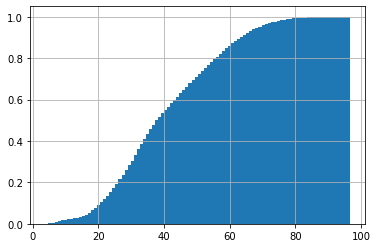

In [27]:
ser = speed['speed_kph_mean']

ser.hist(cumulative=True, density=1, bins=100)
plt.show()

In [30]:
hourly = speed.groupby([speed['osm_way_id'],
                        speed['utc_timestamp'].dt.hour]).agg({'speed_kph_mean':'mean', 'speed_kph_stddev':std_avg})
#                 .reset_index()
#                 .rename(columns={'utc_timestamp': 'hour'}),
hourly
# hourly[hourly['osm_way_id'] == 4723375]
# h = hourly['osm_way_id'] 
# for i in range(24):
#     temp = hourly[hourly[]]
#     h.merge(right=hourly['osm_way_id','speed_kph_mean'] ,left_on = [''])
# avg0 =  

speed_kph_mean  speed_kph_stddev
osm_way_id utc_timestamp                                  
4723375    0                   41.980241         20.434581
           1                   43.219640         20.270420
           2                   43.988958         20.755090
           3                   46.874500         19.513405
           4                   44.284556         20.680153
...                                  ...               ...
678572285  18                  15.587000          6.737000
           20                  10.665000          3.729628
           21                  13.188000          3.585000
           22                  15.387000          4.320202
           23                  17.460000          4.110000

[520 rows x 2 columns]